<a href="https://colab.research.google.com/github/Ziedny28/PCVK-Ganjil-2023/blob/main/week-12/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab import drive

In [27]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
def cascade(image, cascade):

    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Original')

    # Detect faces
    roi_faces = cascade.detectMultiScale(image)

    # Draw rectangles around the faces on the left
    for (x, y, w, h) in roi_faces:
        cv.rectangle(image, (x, y), (x+w, y+h), (255, 255, 255), 3)

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('With Rectangles')

    # Show the plots
    plt.show()


## Tugas Praktikum

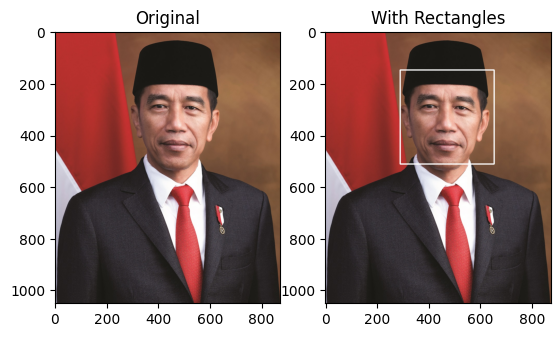

In [35]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/pcvk-resources/haarcascades/haarcascade_frontalface_alt.xml')
jokowi = cv.imread('/content/drive/MyDrive/pcvk-resources/facedet/jokowi.jpg')

cascade(jokowi, cascade_wajah)

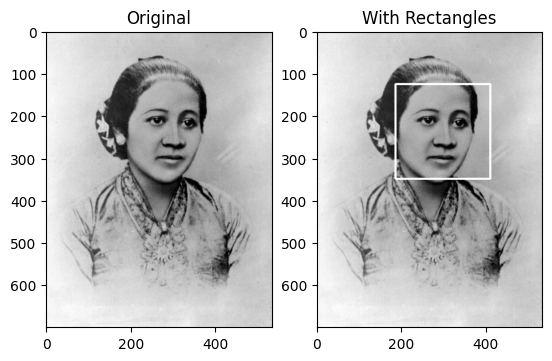

In [29]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/pcvk-resources/haarcascades/haarcascade_frontalface_alt.xml')
kartini = cv.imread('/content/drive/MyDrive/pcvk-resources/facedet/kartini.jpg')

cascade(kartini, cascade_wajah)


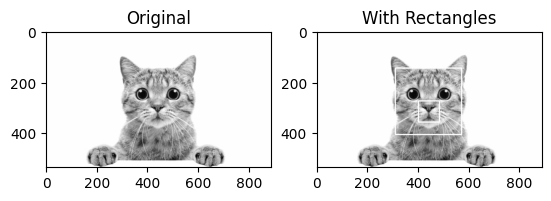

In [36]:
cascade_cat = cv.CascadeClassifier('/content/drive/MyDrive/pcvk-resources/haarcascades/haarcascade_frontalcatface.xml')
kucing = cv.imread('/content/drive/MyDrive/pcvk-resources/facedet/kucing.jpg',0)

cascade(kucing, cascade_cat)

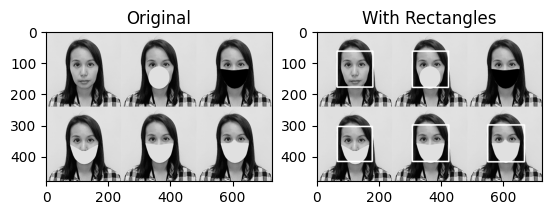

In [37]:

mask = cv.imread('/content/drive/MyDrive/pcvk-resources/facedet/mask.png',0)

cascade(mask, cascade_wajah)


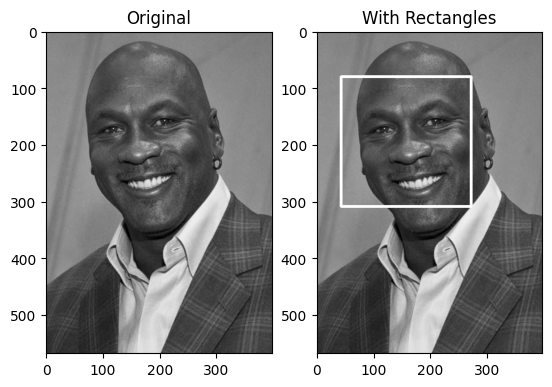

In [38]:
mjordan = cv.imread('/content/drive/MyDrive/pcvk-resources/facedet/mjordan.jpg',0)

cascade(mjordan, cascade_wajah)

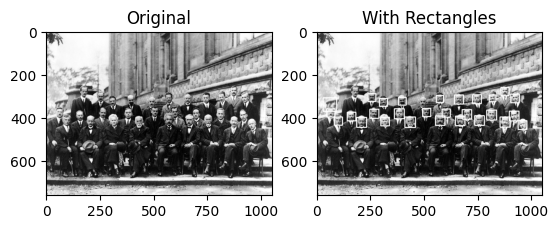

In [33]:
solvayconf = cv.imread('/content/drive/MyDrive/pcvk-resources/facedet/solvayconf.jpg')

cascade(solvayconf, cascade_wajah)

## Nomor 3

Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.

## Nomor 4

Cobakan juga untuk eyes detection.

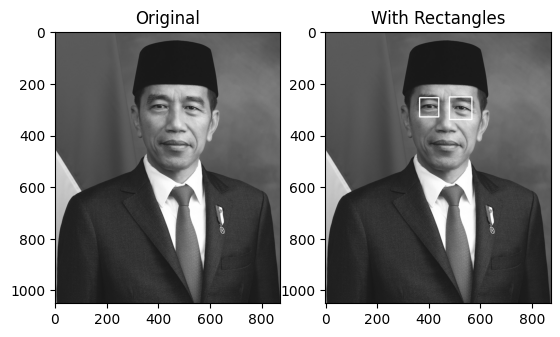

In [41]:
cascade_mata = cv.CascadeClassifier('/content/drive/MyDrive/pcvk-resources/haarcascades/haarcascade_eye.xml')
jokowi = cv.imread('/content/drive/MyDrive/pcvk-resources/facedet/jokowi.jpg',0)
cascade(jokowi, cascade_mata)

## Nomor 5

Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya
tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link
berikut: https://www.youtube.com/watch?v=YjWh7QvVH60